In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(Measure.date).order_by(Measure.date.desc()).first()
recent_date

('2017-08-23',)

One Year ago: 2016-08-22


Text(0, 0.5, 'Inches')

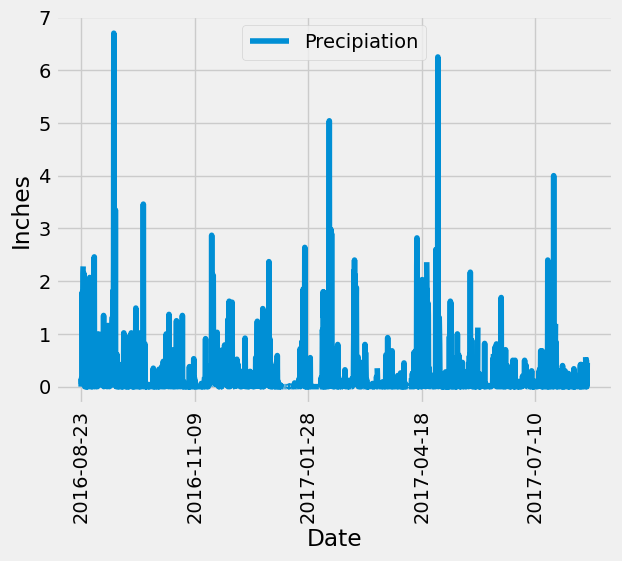

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print("One Year ago:", year_ago)

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measure.date, Measure.prcp).\
            filter(Measure.date > year_ago).\
            order_by(Measure.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp)
prcp_df = prcp_df.rename(columns={"date": "Date", "prcp": "Precipiation"})
prcp_df = prcp_df.set_index("Date")
prcp_df
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.xticks(rotation=90)
plt.legend(loc='upper center')
plt.xlabel("Date")
plt.ylabel("Inches")




In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipiation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(Station.station).count()
total_station

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
count_station = session.query(Measure.station,func.count(Measure.station)).\
                    order_by(func.count(Measure.station).desc()).\
                    group_by(Measure.station).all()
count_station


                

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#calculates and isolates the id of the most active station.
#---------------------------------------------------------------------------------------
most_active_station_all = session.query(Measure.station, func.count(Measure.station)).\
    order_by(func.count(Measure.station).desc()).\
    group_by(Measure.station).first()
most_active_station = most_active_station_all[0]
print(most_active_station)
#----------------------------------------------------------------------------------------
#Finds the lowest Temp of that station.
lowest = session.query(func.min(Measure.tobs)).\
    filter(Measure.station == most_active_station).all()
print(lowest)
#----------------------------------------------------------------------------------------
#finds the highest Temp of that station.
highest = session.query(func.max(Measure.tobs)).\
    filter(Measure.station == most_active_station).all()
print(highest)
#----------------------------------------------------------------------------------------
#finds the average Temp of that station.
average = session.query(func.avg(Measure.tobs)).\
    filter(Measure.station == most_active_station).all()
print(average)
#----------------------------------------------------------------------------------------



USC00519281
[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


Text(0.5, 1.0, 'Time of Observations')

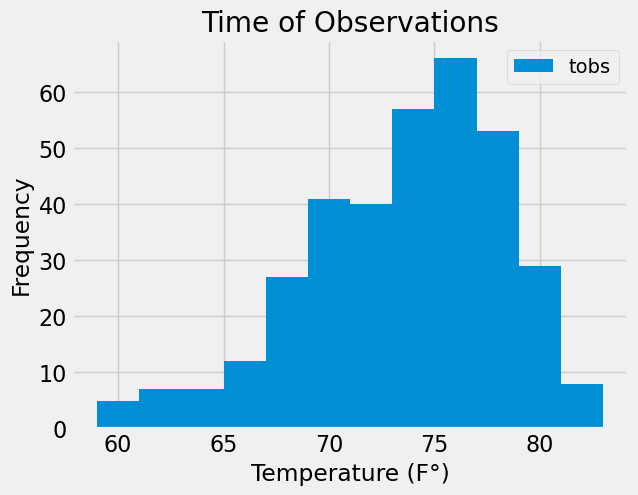

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_station_date = session.query(Measure.date, Measure.tobs).\
    filter(Measure.station == most_active_station).\
    order_by(Measure.date.desc()).first()

year_to_date = session.query(Measure.date, Measure.tobs).\
    filter(Measure.station == most_active_station).\
    filter(Measure.date > year_ago).all()

year_to_date_tob_df = pd.DataFrame(year_to_date)
year_to_date_tob_df    

hist = year_to_date_tob_df.hist(bins=12,legend = True)
plt.xlabel('Temperature (F°)')
plt.ylabel('Frequency')
plt.xticks(fontsize = 16)
plt.yticks(fontsize= 16)
plt.title("Time of Observations")


# Close Session

In [20]:
# Close Session
session.close()